# Whiskies Correlations

This code originates from my completion of Week 4, Case Study 1 of the free access version of Harvard EdX course ["Using Python for Research"](https://www.edx.org/course/using-python-for-research) in the summer of 2022. 

It was intended to be an exercise to demonstrate the use of Bokeh for interactive visualizations of data. 

Python is the primary language utilized. NumPy, Pandas, PyPlot, Scikit-Learn, and Bokeh libraries are used. 

### Imports

Spectral Co-clustering is imported from Scikit-Learn.

NumPy and Pandas are imported. 

From Bokeh.Models, HoverTools and ColumnDataSource are imported, which allow us to add the "Hover" interaction to our data and store our data in a more organized manner, respectively. 
From Bokeh.Plotting, Figure, output_file, and show are imported for basic Bokeh functions. 

Product is imported from Itertools for efficient looping, and used only in the basic demonstrations of Bokeh.

We declare a list of hex color values in the `source_colors` variable, which will be used by Bokeh.

The data set, a csv file, is imported and stored in the `whiskey` variable using Pandas. This is what will be used for visualization and demonstration. In the original course exercise, a base version of this data set was initially explored and the `"Group"` column created from Spectral Coclustering. The imported data set is the secondary version that was provided for further exercises, which also includes the `"Region"` column. As such, the provided `"Group"` column is dropped from the Dataframe, so that we might create our own.

In [55]:
from sklearn.cluster import SpectralCoclustering
import numpy as np, pandas as pd
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure, output_file, show
import matplotlib.pyplot as plt
from itertools import product

source_colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#a7072d','#2ff7f2','#5e73bd']

whiskey = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@whiskies.csv", index_col=0)
whiskey = whiskey.drop(["Group"],axis=1)

## Bokeh Introduction and Basic Demonstration

### Bokeh Introduction and Basic Variables

Bokeh allows data to be visualized, potentially with interactive elements; python and javascript elements may be used, and visualizations open as `.html` files rendered by web browsers. The following code cell demonstrates Bokeh's use in a general sense, rather than having any particular source data visualized.

For this example, we will make a 5x5 grid. We manually delcare the `plot_values` variable, containing integers from 1-5 inclusive. 

There is no particular reason to select a 5x5 plot aside from being an easily manageable size; it is unrelated to our Whiskies DataSet. 

Bokeh takes hex values for colors, stored in `plot_colors`: #03f0fc is a bright electric blue, and #fca103 is a bright orange. Selection is personal preference and readability. This allows Bokeh to be rather useful, as it can be customized to any desired color scheme with relative ease. We declared `source_colors` for consistency in the Bokeh products coded for later in this notebook.

In [56]:
plot_values = [1,2,3,4,5]
plot_colors = ['#03f0fc','#fca103']

We create the `grid` we will display using Bokeh. We use the `product` function from itertools and Python's inbuilt `zip` function for efficient looping and generation with iterables.

We assign color values to the `bokeh_colors` variable, using list comprehension to alternate between our chosen `plot_colors` with one color per cell of our target `grid` in order along rows from left to right, top to bottom.

Finally, we determine the transparency (`alphas`) of each point, where 0 is completely transparent and 1 is entirely opaque. We use `np.linspace` to create an evenly spaced gradient of values. This will cause decreasing transparency diagonally from bottom left to top right: the bottom leftmost values **(1,1)** will be transparent, and the top rightmost values **(5,5)** will be entirely opaque.

In [57]:
plot_values = [1,2,3,4,5]
plot_colors = ['#03f0fc','#fca103']
grid=list(product(plot_values,plot_values))

xs,ys = zip(*grid)

bokeh_colors = [plot_colors[i%2] for i in range (len(grid))]

alphas = np.linspace(0,1,len(grid))

### ColumnDataSource

The core of Bokeh plots are `ColumnDataSource` (commonly called CDS in shorthand) objects. These source objects allow data to be passed through multiple different renderers, so understanding their composition is key to utilizing Bokeh plots to render data visualizations efficiently. 

Each `ColumnDataSource` utilizes a dictionary. Each dictionary's keys serve as column names, and the values become the data values utilized by Bokeh. Here, we declare the `xs`, `ys`, `colors`, and `alphas` we intend Bokeh to use in our example grid visualization.

In [58]:
source = ColumnDataSource(
    data = {
        "x":xs,
        "y":ys,
        "colors":bokeh_colors,
        "alphas":alphas,
    }
)

### Basic Grid Visualization

Finally, we create our visualization.

We name our `output_file`, and give it a title. 

We declare our `fig` object, and indicate we would like the optional passive-inspector tool called `hover`. This is our primary interactivity in this example! With the `hover` tool, additional data can be explored from any of the rendered data objects by hovering over them with the cursor.

We specify that we would like a `rect`angular glyphs. We use the `"x"` and `"y"` values we previously stored in the `source` CDS object, specify height and width both at 0.9 to generate squares, and use the `"colors"` and `"alphas"` we had also stored in the `source` CDS object.

We configure the `hover` tool to customize what is shown when our figure is interacted with: on hovering over any data point, the `"Value"` (x,y coordinate) will be displayed.

In [59]:
output_file("Bokeh_Basic.html", title="Bokeh - Basic")
fig = figure(tools="hover")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }
show(fig)

### Bokeh Scatterplot: x,y Coordinates for Latitude-Longitude Visualization

We can similary use Bokeh to plot using latitude and longitude, though there are other visualizations, such as Cartopy, that may be more appropriate for analyzing locational data specifically. We are similarly using the `ColumnDataSource` to organize our data for Bokeh's translation to visualization.

This code was provided in the course as a demonstration, and has only been nominally changed. It is a highly simplified example of the code structure. 

If this is a new code structure, it may be beneficial to experiment using this code structure with various numbers of data points, and various ranges of data. **Notice that `ColumnDataSource` requires all 'columns' to be the same length, and that entries are linked in a 1:1 fashion as renderer iterates over the provided entries.**

What is important in this example is to note that each **x** and **y** coordinate is plotted like a scatter-plot, which is particularly useful for locational data as lattitude and longitude naturally form such (**x**,**y**) structure.

Note the change to the configuration of the `hover` tool: x and y coordinates are still shown when hovering over any data point, but are now labeled as `"Location"`. Observe how on the rendered visualization, there is no information provided by `hover` where a data point was not plotted.

In [60]:
points = [(4,2), (2,1), (3,3)]
xs, ys = zip(*points)
colors = ['#03f0fc', '#de8f05', '#fca103']

output_file("Spatial_Scatter_Bokeh_Example.html", title="Bokeh Location Scatter Plot Regional Example")
location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)

fig = figure(title = "Title",
    x_axis_location = "above", tools="hover, save")
fig.circle("x", "y", size=8, source=location_source,
     color='colors', line_color = None)

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Location": "(@x, @y)"
}
show(fig)

## Whiskey Exploration

### Initial Exploration of Data Set

The first stage of utilizing any new data set should be exploration of the data included in the set, including its source.

This data set was originally provided as a csv file. We come into the data set with the expectation that each row contains data about a single whiskey produced in Scotland, with one Whiskey per distillery. Each Whiskey is "graded" on various aspects of its flavor profile (though, from the data set itself, we do not know by whom or what specific criteria may have been used for evaluation). 

Exploration of the created `whiskey` DataFrame reveals that there are 86 included Whiskies, and 18 'Columns' of Data for each Whiskey.

In [61]:
print(whiskey.head())
print(whiskey.shape)

   RowID          Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  \
0     86        Tullibardine     2          3      0          0        1   
1     34           GlenElgin     2          3      1          0        0   
2     33  GlenDeveronMacduff     2          3      1          1        1   
3     41            GlenSpey     1          3      1          0        0   
4     46         Glenfiddich     1          3      1          0        0   

   Honey  Spicy  Winey  Nutty  Malty  Fruity  Floral   Postcode   Latitude  \
0      0      2      1      1      2       2       1    PH4 1QG     289690   
1      2      1      1      1      1       2       3   IV30 3SL     322640   
2      1      1      2      0      2       0       1    AB4 3JT     372120   
3      0      1      1      1      2       0       2   AB38 7AU     327760   
4      0      0      0      0      2       2       2   AB55 4DH     332680   

    Longitude     Region  
0      708850  Highlands  
1      861040   Spey

We use `whiskey.columns` to examine what points of data we expect to be provided about each whiskey.

We see that the first two columns [0:2] are `"RowID"` and `"Distillery"` respectively.

We find that all `flavor_profiles` are included in the next 12 columns: `"Body"`,`"Sweetness"`, `"Smoky"`, `"Medicinal"`, `"Tobacco"`, `"Honey"`, `"Spicy"`, `"Winey"`, `"Nutty"`, `"Malty"`, `"Fruity"`, and `"Floral"`.

We find that the remaining columns are `"Postcode"`, `"Latitude"`, `"Longitude"`, and `"Region"` of where the whiskey was produced (the distillery).

In [62]:
print(whiskey.columns)

flavor_profiles = whiskey.iloc[:,2:14]

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')


### Flavors

How are these flavor profiles characterized? In our initial examination, we noted that there appeared to be **integer** values in each cell relating to an aspect of the **flavor profile**.

We can examine these scores in a bit more detail, so we understand how these whiskies have been characterized.

First, we can inspect the maximum values of each **flavor**. `"Tobacco"` appears to have the lowest maximum, with a peak score of 1. No **flavor** has a score higher than 4.

In [63]:
flavor_profiles.max()

Body         4
Sweetness    4
Smoky        4
Medicinal    4
Tobacco      1
Honey        4
Spicy        3
Winey        4
Nutty        4
Malty        3
Fruity       3
Floral       4
dtype: int64

Inspection of minimum values shows that each **flavor** has a minimum score of 0 except for `"Sweetness"`, which has a minimum score of 1.

Each **flavor** appears to be scored from 0 - 4, with no half scores. Functionally, this is a **discrete numeric variable**. While there is no legend provided in the DataSet, it may be a reasonable assumption to believe that a score of 0 indicates a **lack of a flavor**, while a score of 4 indicates a **strong flavor**, with intermediary scores dividing the resulting continuum of intensity.

In [64]:
flavor_profiles.min()

Body         0
Sweetness    1
Smoky        0
Medicinal    0
Tobacco      0
Honey        0
Spicy        0
Winey        0
Nutty        0
Malty        0
Fruity       0
Floral       0
dtype: int64

We can perform some basic summary statistics to explore each of these **flavors** further, if desired.

While not the cleanest method to visualize this data, we can simply loop through each of these columns and use the `describe` function that is built in to Pandas. We see that every whiskey has a rating for each **flavor**. The median scores appear similar to means with a cursory overview.

In [65]:
summary_stats = {}
for flavor in flavor_profiles:
    summary_stats[flavor] = flavor_profiles[flavor].describe()

print(summary_stats)



{'Body': count    86.000000
mean      2.069767
std       0.930410
min       0.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: Body, dtype: float64, 'Sweetness': count    86.000000
mean      2.290698
std       0.717287
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Sweetness, dtype: float64, 'Smoky': count    86.000000
mean      1.534884
std       0.863613
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: Smoky, dtype: float64, 'Medicinal': count    86.000000
mean      0.546512
std       0.990032
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       4.000000
Name: Medicinal, dtype: float64, 'Tobacco': count    86.000000
mean      0.116279
std       0.322439
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Tobacco, dtype: float64, 'Honey': count    86.000000
mea

### Exploring Linear Correlations

#### Pairwise Linear Correlation: Flavor to Flavor

Now that we have a general understanding of the shape and form of our data set, we can explore relationships expressed within it. 

Pandas has a built in function for Linear Correlations: `corr`. 

First, lets examine relationships between individual **flavors** that compose each **flavor profile**. The documentation for the `corr` function is worth examining: here we pass a DataFrame (`flavor_profiles`), and Pandas will perform a pairwise correlation among columns - since we are not specifying otherwise, the default Pearson Correlation Coefficient is performed.

We are returned a new data frame. Each column still corresponds to each **flavor**, but each **row** indicates which **flavor** the column **flavor** was associated with rather than an individual whiskey. 

Values of Pearson Correlation Coefficients range from -1 to 1. Negative values indicate a negative association (indicating the **flavors** are **less** likely to appear together), while positive values indicate a positive association (indicating **flavors** are **more** likely to appear together). A value of 0 indicates **no relationship**. 

If each **flavor** was scored in a binary "yes/no" or 0/1 fashion, we might expect the correlation to only extend to the presence of each **flavor,** but because the **flavors** are scored on intensity, the intensity of the flavors impact our correlation as well. As such each cell value is the Pearson Correlation Coefficients of the association between the value of the **column flavor**, factoring in intensity, to the **row flavor**, also factoring in intensity. We can interpret this to state that **the higher absolute value the Pearson Correlation Coefficient, the stronger the link between the intensity of the two flavors**. 

We store this new DataFrame of correlation values as `flav_correlations`.

**It is important to remember that these associations do not imply direction or causality! As such, the association of `"Sweetness"` to `"Honey"` is the same as the association of `"Honey"` to `"Sweetness"`.**

In [66]:
flav_correlations = pd.DataFrame.corr(flavor_profiles)
print(flav_correlations)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

Based on our knowledge of Pairwise Linear Correlations and the `corr` function, we can do a few checks to ensure we have an output that conforms to our theoretical expectations.

1. We expect our data to be symmetrical with 12 columns and 12 rows. This is because we have 12 individual **flavors**. We can check this with the `shape` attribute of our DataFrame.


In [67]:
flav_correlations.shape

(12, 12)

2. We can expect the data along the diagonal to represent consistent values of 1. 

This is because `flav_correlations.iloc[0,0]` represents the same **flavor** associated with itself. As each **flavor** is only rated once for each whiskey, it logically follows that the correlation between scores for any **flavor**, such as `"Sweetness"` to `"Sweetness"` or `"Spicy"` to `"Spicy"` must be 1:1.

In [68]:
flav_correlations.describe

<bound method NDFrame.describe of                Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.1

3. We expect the data to be mirrored symmetrically along the diagonal. 

This is because association does not have a direction. As such, the correlation between `"Sweetness"` and `"Honey"`, the second and sixth **flavors** (at index 0 and 5 respectively) should be found to be the same regardless of the direction of comparison.

We check this by comparing the values at [1,5] and [5,1] - they should be identical. And they are, both holding a value of **0.13255813864905464**.

In [69]:
print(flav_correlations.iloc[1,5])
print(flav_correlations.iloc[5,1])
print(flav_correlations.iloc[1,5]==flav_correlations.iloc[5,1])

0.13255813864905464
0.13255813864905464
True


While this correlation data set, at 12 by 12, is manageable, this process needs to be scalable. PyPlot gives us a fairly simple method of visually assessing this data, reducing risk of transposing digits, a row shifted in display, or other common sources of error when quickly overviewing the data.

We declare our list of `flavors`, to label our axes. We declare our `fig` and `ax` objects, shift our plot to make room for our labels, generate the `heatmap` figure using the `pcolor` function, add our `colorbar` legend, and label our axes. As there are few labels, we can indicate `minor = False` in our axes to have every tick labeled.

Finally, we show our figure.

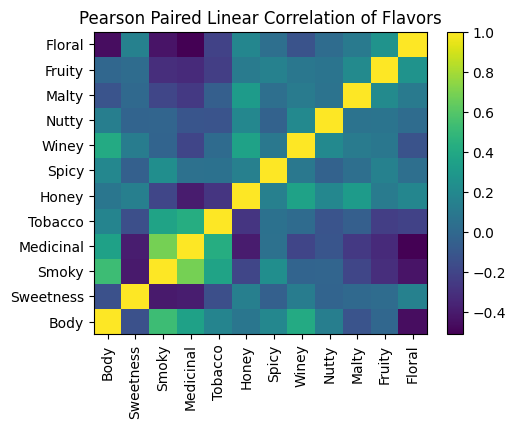

In [70]:
flavors = list(flav_correlations.columns)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25,left=0.25)
heatmap = ax.pcolor(flav_correlations)
plt.title("Pearson Paired Linear Correlation of Flavors")
cbar = plt.colorbar(heatmap)
ax.set_xticks(np.arange(flav_correlations.shape[1])+0.5, minor = False)
ax.set_yticks(np.arange(flav_correlations.shape[0])+0.5, minor = False)
ax.set_xticklabels(flavors, rotation=90)
ax.set_yticklabels(flavors)

plt.show()

As we can see, our `heatmap` provides a wealth of information about our **flavors** at a glance. 

We can check our data against our expectations at a glance:
1. We have an 12 x 12 product, reflecting that each **flavor** was correlated with each other **flavor**
2. The diagonal represents consistent values of 1, as each **flavor** has a 1:1 correlation with itself.
3. The data is mirrored symmetrically across the diagonal, as the associations have no direction.

In any individual **flavor profile**, it is unlikely for a whiskey to have `"Sweetness"`, while also being either `"Medicinal"` or `"Smoky"`. Conversely, a whiskey with `"Medicinal"` is more likely to also have `"Smoky"`.

This is an interesting overview of how flavors tend to coexist within a single whiskey, but what else can we do with this data?

#### Linear Pairwise Correlations: Distilleries to Distillery (Comparison of Flavor Profiles)

The data takes on a much more interesting form for analysis when we take it's `transpose`. When we take the `transpose` of a DataFrame, we "flip" the data across its diagonal - rows convert into columns, and vice versa.

In our `whiskey` data set, this organizes each column into the **flavor profile** of each Distillery's product. We can then take the Linear Pairwise Correlations of each column (each distillery's flavor profile) to find the relationship between the **flavor profiles of each distillery**.

This quantifies how similar the flavor profile of a `"Tullibardine"` whiskey is to, say, an `"Aberfeldy"` whiskey. Which could be quite useful. Do you have anyone who is partial to a very particular whiskey, and worried that you might not be able to get that exact one? Or perhaps you are really partial to a particular whiskey, but cautious about branching out to others given the price tag? This allows us to quantify our best "back up!"

In [71]:
distillery_profiles = flavor_profiles.transpose()

We might be tempted to analyze this data in the same way as we did the correlation of **flavors**, but there's a catch: we now have 86 rows by 12 columns. It becomes much less reasonable to check any given row manually, sheerly due to the size of the data.

In addition, each "flavor profile" is now composed of 12 flavors - the mean, standard deviation, and other summary statistics make much less meaningful sense when taken across a **flavor profile**. We examine the summary statistics for the whiskey with the index value of `0`: `"Tullibardine"`. 

What does a mean of 1.25 truly indicate in this context? Or an IQR of 0.75-2.00? The minimum value of 0 and maximum value of 3 indicate that the most "intense" **flavor** is fairly strong and some may be absent, but we get no real understanding of the **flavor profile** from this at face value.

In [72]:
print(distillery_profiles[0].describe())

count    12.000000
mean      1.250000
std       0.965307
min       0.000000
25%       0.750000
50%       1.000000
75%       2.000000
max       3.000000
Name: 0, dtype: float64


We can, and should, do a few basic checks for our transformed data, such as ensuring that the shape is the expected 12 by 86, and checking the first few rows to ensure they take the expected form of **flavors** for rows and the index for **each distillery marking columns**. While it is possible to configure our DataFrame to take headers, it is not beneficial in our analysis at this time.

We see that the data does follow our expected form: there are 12 flavors represented for 86 whiskies, each flavor is rated from 0-4. The `transpose` appears to have not had any issues, so we can continue with our analysis.

In [73]:
print(distillery_profiles.shape)
print(distillery_profiles.head())

(12, 86)
           0   1   2   3   4   5   6   7   8   9   ...  76  77  78  79  80  \
Body        2   2   2   1   1   1   2   1   2   2  ...   2   3   2   2   2   
Sweetness   3   3   3   3   3   2   3   3   2   1  ...   1   2   2   3   2   
Smoky       0   1   1   1   1   1   1   1   3   3  ...   1   2   2   1   2   
Medicinal   0   0   1   0   0   0   0   1   1   0  ...   0   0   0   0   0   
Tobacco     1   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   

           81  82  83  84  85  
Body        1   2   1   2   2  
Sweetness   2   3   2   2   2  
Smoky       0   1   0   1   2  
Medicinal   0   0   0   1   0  
Tobacco     0   0   0   0   0  

[5 rows x 86 columns]


Now we can create our **Linear Correlation Matrix**, similarly to how we correlated across individual flavors. This generates the correlation between the **flavor profiles** of each **distillery**. 

As a reminder:

We pass a DataFrame (`distillery_profiles`), and Pandas will perform a pairwise correlation among columns - since we are not specifying otherwise, the default Pearson Correlation Coefficient is performed.

We are returned a new DataFrame. Each column still corresponds to each **distillery's flavor profile**, but each **row** indicates which **distillery's flavor profile** the column **distillery's flavor profile** was associated with rather than an individual whiskey. This association calculates for **every aspect of the flavor profile, not just the aggregate "mean" scores**. 

***This allows the computer to perform and return a much more robust association than could be easily performed by hand. For two distilleries to be associated, it is not enough that they have similar total values for all flavors, but that they have related intensity values for each individual flavor that composes that flavor profile.***

Values of Pearson Correlation Coefficients range from -1 to 1. Negative values indicate a negative association (indicating the **flavor profiles of the distilleries** are **less** similar), while positive values indicate a positive association (indicating **flavor profiles of the distilleries** are **more** similar). A value of 0 indicates **no relationship**. If two **distilleries** create "opposite" **flavor profiles**, we would expect them to have a negative association, not no association.

 We can interpret this to state that **the higher absolute value the Pearson Correlation Coefficient, the stronger the similarity of the overall flavor profiles between the whiskies produced at both distilleries**. If you are looking for your "backup" or "next best," look for a strong positive association with a known whiskey you like. If you are looking for something to avoid, look for a strong negative association with a known whiskey you like.

We store this new DataFrame of correlation values as `dist_correlations`.

**It is important to remember that these associations do not imply direction or causality! As such, the association of `"GlenElgin"` to `"Scapa"` is the same as the association of `"Scapa"` to `"GlenElgin"`.**

In [74]:
dist_correlations = pd.DataFrame.corr(distillery_profiles)

In attempting to examine the data for `dist_correlations`, the size problem from `distillery_profiles` is even more magnified - it is an 86 by 86 grid. As we have demonstrated checks for size, and examining the first few rows, we will omit those steps here.

The most benefit for time is found through examination of a visualization of the data. 

We declare our list of `distilleries` from our original data set, to label our axes. We declare our `fig` and `ax` objects, shift our plot to make room for our labels, generate the `heatmap` figure using the `pcolor` function, add our `colorbar` legend, and label our axes. As there are MANY labels, we can indicate `minor = True` in our axes so that our data is not overly cluttered. 

Finally, we show our figure.

C:\Users\morri\AppData\Local\Temp\ipykernel_8780\1032063980.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(distilleries, rotation=90)
C:\Users\morri\AppData\Local\Temp\ipykernel_8780\1032063980.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(distilleries)


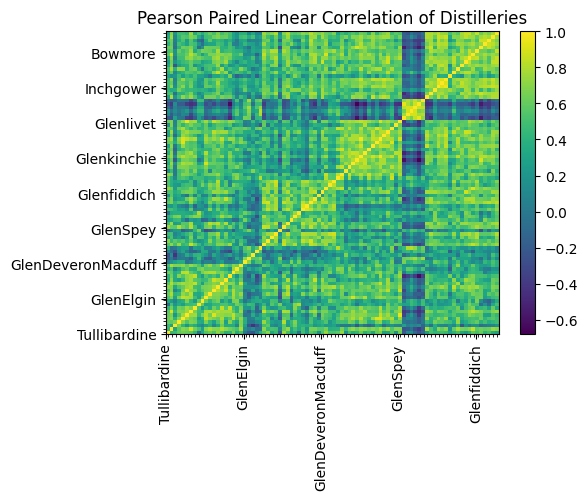

In [75]:
distilleries = list(whiskey.Distillery)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25,left=0.25)
heatmap = ax.pcolor(dist_correlations)
plt.title("Pearson Paired Linear Correlation of Distilleries")
cbar = plt.colorbar(heatmap)
ax.set_xticks(np.arange(dist_correlations.shape[1])+0.5, minor = True)
ax.set_yticks(np.arange(dist_correlations.shape[0])+0.5, minor = True)
ax.set_xticklabels(distilleries, rotation=90)
ax.set_yticklabels(distilleries)


plt.show()

As we can see, our `heatmap` provides a wealth of information about our **distilleries** at a glance. 

We can check our data against our expectations at a glance:
1. We have an 86 x 86 product, reflecting that each **distillery's flavor profile** was correlated with each other **distillery's flavor profile**
2. The diagonal represents consistent values of 1, as each **distillery** has a 1:1 correlation with itself.
3. The data is mirrored symmetrically across the diagonal, as the associations have no direction.

We can see bands that indicate certain **distilleries** appear to have opposite flavor profiles, and others appear to be strongly clustered.

There is a particular inclination this visual pattern gives us: it appears to be a "**checkerboard pattern**." This indicates that there may be **"clusters"** we can sort these whiskies into, which could serve as a "short hand" or "label" that indicates these flavor profiles.

## Clustering

Scotch whiskies are traditionally clustered by `"Region"`, with six major regions: Speyside, Highlands, Lowlands, Islands, Campbelltown, and Islay. These regions are geographic, but do they also indicate any association with **flavor profile**? Do whiskies in the same `"Region"` have similar **flavor profiles**, or should we have a different indicator on labels?

We already explored the association between **distilleries** (by **flavor profile**) in `dist_correlations`. Since our original data set also included `"Regions"` for each whiskey, we can continue our analysis to explore this relationship.

### Region Analysis - Unsorted

First, lets get an understanding of the value that `"Region"` provides us. We can do this with a few Bokeoh grid visualizations.

It would be tempting to simply use `dist_correlations`, as this already shows us all of the associations between our **distilleries**. However, this data is not sorted meaningfully by `"Region"` and would be difficult to interpret. To solidify this, lets go through the process of visualization without sorting, and compare it to our sorted model.

First, lets define the data values we will place into our `ColumnDataSource`.

We know that our Linear Correlation Matrix, `dist_correlations`, has 86 columns and 86 rows. These share the same labels: each of the distilleries, in order. We can use Numpy to generate our **x** and **y** grid values from our `distilleries` list.


In [76]:
rus_xs = np.repeat(distilleries,len(distilleries))
rus_ys = list(distilleries)*len(distilleries)

We define our colors for each `"Region"`, and create a dictionary linking each `"Region"` to a specific color.

We also convert our Linear Correlation Matrix `dist_correlations` from Pandas DataFrame into a NumPy Array.

In [77]:
cluster_colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161']
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = {regions[i] : cluster_colors[i] for i in range(len(regions))}

dist_correlations = np.array(dist_correlations)

We can then iterate through our DataFrame to generate the color values we intend to match to our data points with the following rules:

1. If the Pearson Correlation Coefficient is less than 0.7, we don't want to consider the association strong. As such, the association should be represented by a white box, so that "fades away" in the visual analysis.
2. If the Pearson Correlation Coefficient is greater than 0.7, and the associated distilleries ARE in the **same** `"Region"`, we want to represent that association with the color associated with that `"Region"`.
3. If the Pearson Correaltion Coefficient is greater than 0.7, and the associated whiskeys ARE NOT in the **same** `"Region"`, we want to represent that association with a light grey box. This allows it to be visually represented, but less striking than the colors of each `"Region"`.

We can accomplish this with a simple nested for loop.

In [78]:
rus_correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if dist_correlations[i,j] < 0.7:
            rus_correlation_colors.append("white")
        else:
            if whiskey.Region[i] == whiskey.Region[j]:
                rus_correlation_colors.append(region_colors[whiskey.Region[i]])
            else:
                rus_correlation_colors.append('lightgray')

We initiate our `ColumnDataSource`, using our previously defined x, y, and color values. We indicate our transparencies with `correlations` - by flattening the correlation matrix (which we had to convert into a NumPy array to perform), we are able to provide alpha values so that the transparency of the visualized grid point will reflect the strength of the correlation.

In [79]:
source_region_us = ColumnDataSource(
    data = {
        "x": rus_xs,
        "y": rus_ys,
        "colors": rus_correlation_colors,
        "correlations": dist_correlations.flatten() 
    }
)

And we can generate our Bokeh visualization. 

In [80]:
output_file("Whiskeys by Region - Unmodified.html", title="Whiskeys by Region - Unmodified")
fig = figure(title="Whiskeys by Region - Unmodified",
    x_axis_location="above", x_range=list(reversed(distilleries)), y_range=distilleries,
    tools="hover,box_zoom,reset")
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3
fig.rect('x', 'y', .9, .9, source=source_region_us,
     color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

As we can see, it's difficult to tell if there truly are any meaningful associations between **distilleries** that share the same `"Region"` or not. There are several light grey squares. There appear to be several blue squares. But how can we tell if there are `"Region"` values that have poor association? This is where sorting the data improves our visualization.

### Regions - Sorted

The difference in the power of the visualization comes from the pre-processing of the data. The importance of preparing your data properly for any visualization cannot be overstated. A poor pre-processing will weaken any visual impact, while approrpiate pre-processing will strengthen arguments you make from your analysis. Lets investigate how sorting our whiskies by `"Region"` prior to analysis and visualization will increase the impact and clarity of our visualization.

Pandas has a built in method that can sort our DataFrame by a single column's value: `sort_values`. We specify that we would like to sort our values by `"Region"`. In inspecting the data, we can determine that our transformation was successful. The rows of the data were sorted as units, so all data associated with a specific whiskey in our data set remains associated with that same data, it is simply the order that has changed.

We reset our index (with `drop=True` to avoid adding columns to our data unnecessarily) to ensure that our color-sort function will continue to work. 

**Remember, this is the power of DataFrames: indexes can be separate from row order, so care must be taken to ensure indexes are managed suitably.**

In [81]:
regional_whiskey = whiskey.sort_values(by=["Region"])
regional_whiskey = regional_whiskey.reset_index(drop=True)

We then proceed with an identical creation of our Linear Correlation Matrix, and obtain the new order of the list of **distilleries**.

In [82]:
regional_distilleries = list(regional_whiskey.Distillery)

regional_dist_correlations = pd.DataFrame.corr(regional_whiskey.iloc[:,2:13].transpose())

We define our **x** and **y** values using the new order of **distilleries**.

We convert our Linear Correlation Matrix to an NumPy array, so we can flatten it for use as our alpha values.

In [83]:
rs_xs = np.repeat(regional_distilleries,len(regional_distilleries))
rs_ys = list(regional_distilleries)*len(regional_distilleries)

regional_dist_correlations = np.array(regional_dist_correlations)

We can use the exact same color for each `"Region"`, using our previously defined `region_colors` dictionary. We compose our list of associated colors in the same way as our previous visualization.

In [84]:
rs_correlation_colors = []
for i in range(len(regional_distilleries)):
    for j in range(len(regional_distilleries)):
        if regional_dist_correlations[i,j] < 0.7:
            rs_correlation_colors.append("white")
        else:
            if regional_whiskey.Region[i] == regional_whiskey.Region[j]:
                rs_correlation_colors.append(region_colors[regional_whiskey.Region[i]])
            else:
                rs_correlation_colors.append('lightgray')

We define our `ColumnDataSource` that powers our visualization

In [85]:
source_region_s = ColumnDataSource(
    data = {
        "x": rs_xs,
        "y": rs_ys,
        "colors": rs_correlation_colors,
        "correlations": regional_dist_correlations.flatten() 
    }
)

And finally, we generate our Bokeh visualization.

In [86]:
output_file("Whiskeys by Region - Sorted by Region.html", title="Whiskeys by Region - Sorted by Region")
fig = figure(title="Whiskeys by Region - Sorted by Region",
    x_axis_location="above", x_range=list(reversed(regional_distilleries)), y_range=regional_distilleries,
    tools="hover,box_zoom,reset")
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3
fig.rect('x', 'y', .9, .9, source=source_region_s,
     color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

We can see a much clearer picture from this sorted data!

It appears that there are "pockets" of poor correlations within each `"Region"`, represented by white space. The grey spaces also give us something to think about - are there correlations that are missed by focusing only on `"Region"`?

### Groups: Spectral Coclustering

The "checkerboard" pattern that we noticed in our original data lends us to think that a process called **Spectral Coclustering** might reveal patterns in the data.

Spectral Coclustering utilizes the eigenvalues and eigenvectors of matrix and linear algebra to **find clusters of objects based on the similarity of their attributes.** A full explanation is beyond the scope of this notebook.

A common metaphor is to think of book titles, and their assorted topics. A unidirectional cluster might group book titles based on their topics. But in coclustering, we seek to group book titles and their topics so that we might find an association in either direction: the association's strength is based on the strength of association to the book title and all of it's topics, but is also based on the strength of association of all of the topics to the book titles. This can be represented using an adjacency matrix: rows might correspond to topics, and columns to book titles, with the matrix representing how "close" these values are associated. This creates a much "tighter" association with a characteristic "checkerboard" structure.

Much of our analysis has focused on existing groups and evaluation - this is our step in creating a measure of association to "label" and predict future classification. If we can match distillery **flavor profiles** into `"Group"`s, perhaps we could create a way to predict the **flavor profile** of a new whiskey.

We don't want to deviate too much from our existing structure, so it's reasonable to aim for 6 `"Group"` clusters, similar to the 6 `"Region"`s associated with the whiskies of Scotland. 

Scikit Learn has a `SpectralCoclustering` class that we can use for this process.

We initiate our variable `model`, which will contain our instance of the `SpectralCoclustering` class. We will specify that we would like 6 clusters. 

Since this is a learning exercise and we would like everyone to get the same output regardless of how or when they run the code, we specify the random_state that is used in the k-means algorithm. We specify that we would like to cluster our data based on the Linear Correlation of the **flavor profiles of distilleries**, which we have stored in `dist_correlations`.

We are able to save our output into a new group that we append to our `whiskey` DataFrame: `"Group"`, which assigns each whiskey to one of six groups based on the result of the Spectral Coclustering.

In [87]:
model = SpectralCoclustering(n_clusters=6,random_state=0)
clusters = model.fit(dist_correlations)
cluster_totals = np.sum(model.rows_,axis=1)
cluster_observations = np.sum(model.rows_,axis=0)
whiskey["Group"]=pd.Series(model.row_labels_,index=whiskey.index)

We use NumPy and Pandas to sort our newly appended data set by our new classification of `"Group"`, and reset our index.

In [88]:

clustered_whiskey = whiskey.iloc[np.argsort(model.row_labels_)]
clustered_whiskey = clustered_whiskey.reset_index(drop=True)

Now that we have sorted our data in a new way, it is important to understand how we might have modified our data. As this is such a large data set, it will likely be more efficient to compare visualizations rather than raw data points.

First, lets put our new data set through Linear Correlation

In [89]:
cluster_correlations = pd.DataFrame.corr(clustered_whiskey.iloc[:,2:13].transpose())

We can do an initial overview of the changes made by comparing our main three association plots in PyPlot:

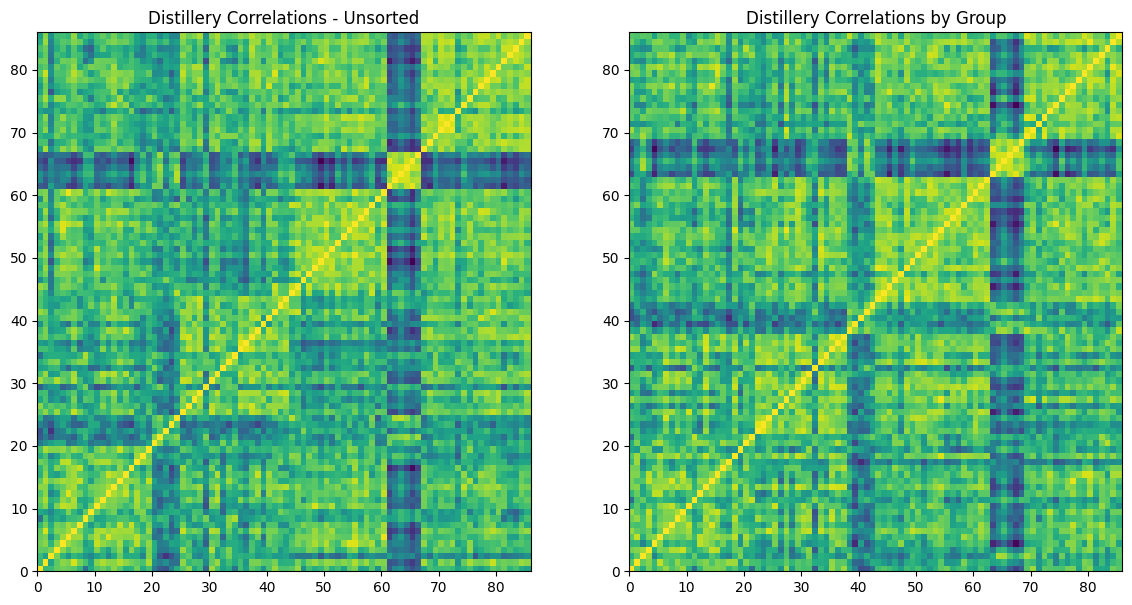

In [90]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.pcolor(dist_correlations)
plt.title("Distillery Correlations - Unsorted")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(cluster_correlations)
plt.title("Distillery Correlations by Group")
plt.axis("tight")
plt.show()

In our initial overview between `dist_correlations`, which was our unsorted analysis of **distillery flavor profiles**, and `cluster_correlations`, which has our **distillery flavor profiles** now sorted by `"Group"`, we see that the more negative associations (dark/blue areas on the `heatmap`) have been reorganized to the far axes, and there appear to be thicker clusters of more positive associations (bright/yellow areas on the `heatmap`).

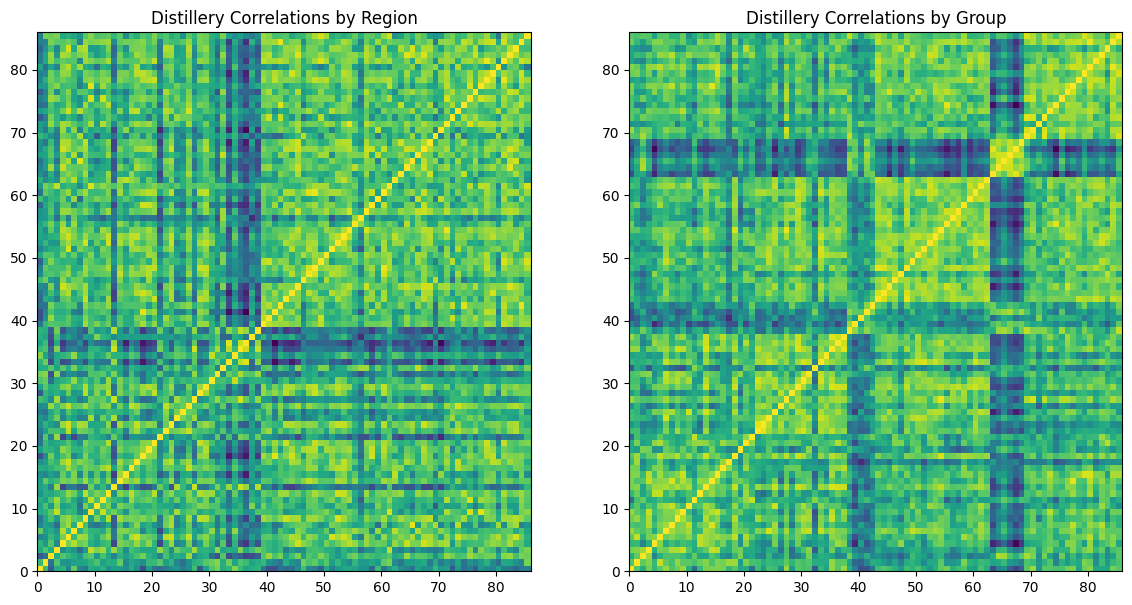

In [91]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.pcolor(regional_dist_correlations)
plt.title("Distillery Correlations by Region")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(cluster_correlations)
plt.title("Distillery Correlations by Group")
plt.axis("tight")
plt.show()

In visually inspecting the difference in association when distilleries are associated by `"Region"` and by `"Group"`, our new association by `"Group"` appears to have a much stronger "checkerboard" pattern, with more concentrated areas of intensities on the `heatmap`.

Like before, we transform our Pandas DataFrame into a NumPy array to facilitate our Bokeh visualization in the same process we have used previously.

We use the same source for our hex colors as we did for our `region_colors`.

In [92]:
cluster_correlations = np.array(cluster_correlations)

cluster_distilleries = list(clustered_whiskey.Distillery)

c_xs = np.repeat(cluster_distilleries,len(cluster_distilleries))
c_ys = list(cluster_distilleries)*len(clustered_whiskey)

groups = [0,1,2,3,4,5]
group_colors = {groups[i]: cluster_colors[i] for i in range(len(groups))}

c_correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if cluster_correlations[i,j] < 0.7:
            c_correlation_colors.append("white")
        else:
            if clustered_whiskey.Group[i] == clustered_whiskey.Group[j]:
                c_correlation_colors.append(group_colors[clustered_whiskey.Group[i]])
            else:
                c_correlation_colors.append('lightgray')

source_cluster = ColumnDataSource(
    data = {
        "x": c_xs,
        "y": c_ys,
        "colors": c_correlation_colors,
        "correlations": cluster_correlations.flatten() 
    }
)

output_file("Whiskeys by Group.html", title="Whiskeys by Group")
fig = figure(title="Whiskeys by Group",
    x_axis_location="above", x_range=list(reversed(cluster_distilleries)), y_range=cluster_distilleries,
    tools="hover,box_zoom,reset")
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3
fig.rect('x', 'y', .9, .9, source=source_cluster,
     color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)


### Evaluation of the New "Group" Categorization with Location Plots: Seeking Geographic Associations

We have now looked at our data in grid form, but what about looking at it geographically? It makes logical sense that `"Region"` might correlate to predefined geographical boundaries, but perhaps our new classification of `"Group"` indicates that these boundaries should be redefined.

Each whiskey in our data set includes a `"Latitude"` and `"Longitude"` value, which are natural **(x,y)** coordinates.

This is a Bokeh plot that builds on understanding `ColumnsDataSource` from the example scatterplot previously shown in this notebook. We have already clustered our data, so there is no need for any further Linear Correlations, clustering, or other modification. This is simply taking the existing data, and using it to explore our new classification `"Group"`.

In [93]:
def location_plot(title, colors):
    output_file(title+".html")
    location_source = ColumnDataSource(
        data = {
            "x": clustered_whiskey[" Latitude"],
            "y": clustered_whiskey[" Longitude"],
            "colors": colors,
            "regions": clustered_whiskey.Region,
            "distilleries": clustered_whiskey.Distillery
        }
    )
    
    fig = figure(title = title,
        x_axis_location = "above", tools="hover, save")
    fig.circle("x", "y", size=9, source=location_source, color='colors', line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)

We generate color codes for our plots. We will create a separate plot for `"Region"` and `"Group"` classifications.

In [94]:
region_cols = [region_colors[clustered_whiskey.loc[:,"Region"][i]] for i in range(len(clustered_whiskey.loc[:,"Region"]))]
group_cols = [group_colors[clustered_whiskey.loc[:,"Group"][i]] for i in range(len(clustered_whiskey.loc[:,"Group"]))]

And we pass our new variables into the function we defined to generate our Bokeh plots.

In [95]:
location_plot("Whiskey Locations and Regions", region_cols)
location_plot("Whiskey Locations and Groups", group_cols)

It's most useful to place these plots side-by-side. We can see a clear geographic organization to `"Regions"`, but not so much in `"Groups"`. 

While this could mean that there is not a geographic link, don't be too quick to rule one out. While `"Latitude"` and `"Longitude"` can be natural **(x,y)** coordinates, they also cannot give the full spread of geographic information. Perhaps the `"Group"` values that appear to be scattered share a common geographic landmark or proximity? 

Further exploration is outside of the scope of this exercise, but it is important to know how to qualify and present work, even when the results have limited value.

## Conclusions

We were able to, in no particular order:
1. Demonstrate associations between **flavors** within the **flavor profiles of Scottish whiskies**
2. Demonstrate the associations between **flavor profiles of individual whiskies**.
3. Characterize these associations by `"Region"`.
4. Develop a new classification system with what appears to be stronger associations than `"Region"` - `"Group"`.
5. Show the value of pre-processing our data, and how pre-processing influences the perception of visualizations of these associations.
6. Visually characterize the geographic dispersion of **distilleries**, by `"Latitude"` and `"Longitude"`, that belong to each `"Region"` and to each `"Group"` to attempt to characterize these groupings geographically.

We were **not** able to:
1. Create a definition of `"Group"` that would allow us to predict the classification of an unknown whiskey by geographic location.

Overall, a great deal was accomplished. The caveat to our accomplishment is a significant one, but it does not discount the value of our exploration and analysis. Rather, it is an opportunity to build with further analysis. 

Perhaps the classification of whiskies will change one day, but I'm not optimistic. There's a great deal of sentiment and history in the existing labels, and the cost in effort and changing valuation tables is likely greater than the perceived benefit. But perhaps, if there is strong enough proof, things will change. One step at a time.

I am fairly new to Python, Data Science, and general coding and industry practices. I welcome any feedback as to how I might improve my code, my general practice, or how I write up and present my process and findings.

While this was written using the data set and general process demonstrated in the source EdX course, this write up does not follow the course material exactly - while some code snippets were provided by the course creators, much of the code has been altered and customized. This write up is an independent personal endeavour to progress past the base course material into a further understanding of the methods behind the processing, and a written organization of both the process and its results. 